# Week 10 Assignment

We had two major areas of discussion this week.  The first was all about how to work with string data - parsing and splitting strings using basic string fuctions as well as more complex string matching using regular expressions.  The second was a basic introduction to Pandas with a few different examples of how to load data into Pandas and then visualize it using graphs (histogram, distribution, scatter, bar, timeseries).

* 36.1 - 1 point
* 36.2 - 1 point
* 38.1 - 3 points

## 36.1 String Manipulation

Write a function that will parse an address that includes one or two parts of street information, a city, a state, and a zip code -- all separated by commas.  You can assume that commas won't appear as part of the address information, only as a delimiter.  Here are some examples:

823 Pebble Street, St. Louis, MO 63105

91 Cityplace, Suite #33, St. Louis, MO 63144

81234 Homeroad, Kansas City, MO 62441


The output you should generate will be a dictionary with the following possible items.

```
{
  'street1': '91 Cityplace',
  'street2': 'Suite #33',
  'city': 'St. Louis',
  'state': 'MO',
  'zip': '63122'
}
```

Declare your function like this:
```
parse_address(address)
```

In [38]:
### YOUR SOLUTION

def address_parser(address, delimiter=','):
    """ (str, str) -> list
    The address parser will take a string that is delimited by some
    character (default of comma) and produce what we expect to be the
    address parts of that string.  Rules:
    If there are 4 items, then they are street1, city, state, zip.
    If there are 5 items, then street1, street2, city, state, zip.
    If neither 4 or 5, then return None
    """
    output = {}
    
    items = address.split(delimiter)
    if len(items) == 4:
        output['street1'] = items[0].strip()
        output['city'] = items[1].strip()
        output['state'] = items[2].strip()
        output['zip'] = items[3].strip()
    elif len(items) == 5:
        output['street1'] = items[0].strip()
        output['street2'] = items[1].strip()
        output['city'] = items[2].strip()
        output['state'] = items[3].strip()
        output['zip'] = items[4].strip()
    else:
        output = None
    
    return output
        

## 36.2 Test the Address Parser

Now write a series of good tests to ensure that your addres parser is going to work with a variety of different inputs.  Include at least 5 different examples.

In [45]:
def ap_test(answer, delimiter=', '):
    string = delimiter.join(list(answer.values()))
    parsed = address_parser(string, delimiter)
    print(string)
    print(parsed)
    return  parsed == answer

In [46]:
a1 = {
    'street1': '720 Benstalk Lane',
    'city': 'Casper',
    'state': 'WY',
    'zip': '82605'
}

ap_test(a1)

720 Benstalk Lane, Casper, WY, 82605
{'street1': '720 Benstalk Lane', 'city': 'Casper', 'state': 'WY', 'zip': '82605'}


True

In [47]:
a1 = {
    'street1': '720 Benstalk Lane',
    'street2': 'Suite 43',
    'city': 'Casper',
    'state': 'WY',
    'zip': '82605'
}

ap_test(a1,'|')

720 Benstalk Lane|Suite 43|Casper|WY|82605
{'street1': '720 Benstalk Lane', 'street2': 'Suite 43', 'city': 'Casper', 'state': 'WY', 'zip': '82605'}


True

## 38.1 COVID-19 Trend Data

Since we're dealing with a global pandemic right now, probably good to go ahead and do some anlysis with that data.  Take a look at what's here: https://ourworldindata.org/covid-sources-comparison

Near the middle of the page, there are two charts with some data.  On the left is "positive cases" and on the right is "deaths."  Both charts have a button that says "Data."  What you will do below is write a series of Python commands (doesn't need to be in a function) to retreive that data and produce a simple timeseries chart using the information from John's Hopkins.  Your code will need to read the data, possibly do some reformatting, and then produce a simple timeseries chart.

(Unfortunately, the tools used on this website don't make it easy to link to and directly download the data, so I've placed a copy in `/data/covid19.csv` for you to access.)

In [48]:
import pandas as pd

In [49]:
covid = pd.read_excel('/data/covid19.xlsx')

In [50]:
covid

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
0,2020-03-21,21,3,2020,2,0,Afghanistan,AF
1,2020-03-20,20,3,2020,0,0,Afghanistan,AF
2,2020-03-19,19,3,2020,0,0,Afghanistan,AF
3,2020-03-18,18,3,2020,1,0,Afghanistan,AF
4,2020-03-17,17,3,2020,5,0,Afghanistan,AF
...,...,...,...,...,...,...,...,...
6007,2019-12-31,31,12,2019,0,0,Vietnam,VN
6008,2020-03-21,21,3,2020,0,0,Zambia,ZM
6009,2020-03-20,20,3,2020,0,0,Zambia,ZM
6010,2020-03-19,19,3,2020,2,0,Zambia,ZM


In [8]:
covid_by_day = covid.groupby(['DateRep'])

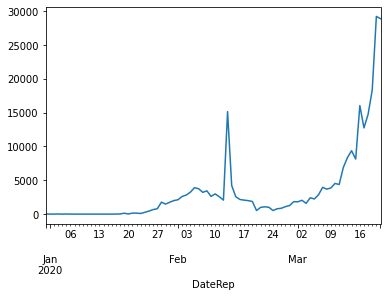

In [54]:
covid_by_day['Cases'].sum().plot()

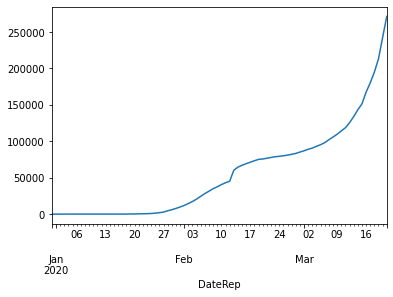

In [14]:
covid_by_day['Cases'].sum().cumsum().plot(style='-')

